In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path
import pprint as pp

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
#sns.set_style("darkgrid") # configuração de estilos dos gráficos do seaborn
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
diretorioPA = 'simulacao_4.0.0_PA'
diretorioPB = 'simulacao_4.0.1_PB'

arquivoDados = 'dataTaxaMacFromMacLayer.csv'
colunas = ['tempo', 'node', 'taxaMAC', 'repeticao'] # como os dados estão organizados no arquivo


In [3]:
# Cada simulacao executada 100 vezes
# como temos três modos de interferência: 0, 1 e 2
# então foram executadas 300 repeticoes no total.

def inferir_modeInterferencia_de_repeticao(item):
    if item <= 100:
        return 0
    elif item <= 200:
        return 1
    elif item <= 300:
        return 2
    else:
        raise Exception('Parâmetro não esperado!')

In [4]:
def calcula_porcentagem_taxaMAC(dados, repeticao = 0):
    if repeticao != 0:
        dados = dados[dados["repeticao"] == repeticao]
    df = dados.groupby(by="taxaMAC",as_index=False).count()
    total = df["node"].sum()
    resultado = pd.DataFrame()
    resultado['taxaMAC'] = df['taxaMAC']
    resultado["freq_absoluta"] = df["node"]
    resultado["freq_relativa"] = df["node"] / total
    return resultado

In [5]:
arquivo = path.join(diretorioPA, arquivoDados)
dfTaxaMacPA = pd.read_csv(arquivo,delimiter='|',names=colunas)
dfTaxaMacPA['InterfModel'] = dfTaxaMacPA['repeticao'].apply(inferir_modeInterferencia_de_repeticao)
dfTaxaMacPA['simulacao'] = 'PA'
dfTaxaMacPA.head()

,tempo,node,taxaMAC,repeticao,InterfModel,simulacao
0,1.245767,4,60,1,0,PA
1,1.273110,5,40,1,0,PA
2,1.468203,3,60,1,0,PA
3,1.477734,1,20,1,0,PA
4,1.483515,5,100,1,0,PA


In [6]:
df = dfTaxaMacPA[dfTaxaMacPA['InterfModel'] != 2]
dfOcorrenciasTaxaMacPA = calcula_porcentagem_taxaMAC(df)
#pp.pprint(dfOcorrenciasTaxaMacPA.T)
#fig = dfOcorrenciasTaxaMacPA['freq_relativa'].plot(kind='bar',color='steelblue')
dfOcorrenciasTaxaMacPA.T

,0,1,2,3,4,5
taxaMAC,0.000000,20.000000,40.000000,60.000000,80.000000,100.000000
freq_absoluta,2371.000000,9040.000000,28975.000000,84438.000000,205320.000000,620358.000000
freq_relativa,0.002494,0.009511,0.030484,0.088835,0.216012,0.652664


In [7]:
arquivo = path.join(diretorioPB, arquivoDados)
dfTaxaMacPB = pd.read_csv(arquivo,delimiter='|', names=colunas)
dfTaxaMacPB['InterfModel'] = dfTaxaMacPB['repeticao'].apply(inferir_modeInterferencia_de_repeticao)
dfTaxaMacPB['simulacao'] = 'PB'
dfTaxaMacPB.head()

,tempo,node,taxaMAC,repeticao,InterfModel,simulacao
0,1.239595,5,60,1,0,PB
1,1.261000,2,20,1,0,PB
2,1.483203,5,80,1,0,PB
3,1.487266,3,60,1,0,PB
4,1.517031,4,60,1,0,PB


In [8]:
dfOcorrenciasTaxaMacPB = calcula_porcentagem_taxaMAC(dfTaxaMacPB)
dfOcorrenciasTaxaMacPB.T

,0,1,2,3,4,5
taxaMAC,0.000000,20.000000,40.000000,60.000000,80.000000,100.000000
freq_absoluta,289928.000000,206046.000000,228425.000000,251449.000000,257823.000000,382685.000000
freq_relativa,0.179371,0.127476,0.141321,0.155565,0.159509,0.236758


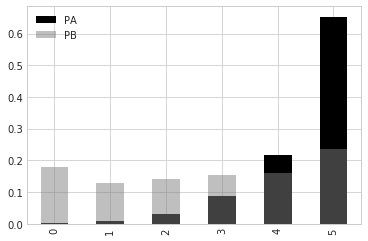

In [9]:
fig = dfOcorrenciasTaxaMacPA['freq_relativa'].plot(kind='bar',color='black', label='PA')
fig = dfOcorrenciasTaxaMacPB['freq_relativa'].plot(kind='bar', color='gray', label='PB', ax=fig, alpha=0.5)
fig.legend()

In [10]:
dfTaxaMAC = dfTaxaMacPA.append(dfTaxaMacPB,ignore_index=True)
dfTaxaMAC.sample(5)

,tempo,node,taxaMAC,repeticao,InterfModel,simulacao
1635211,72.313910,3,80,40,0,PB
2294510,76.634475,4,40,162,1,PB
1603628,105.166423,4,80,34,0,PB
195801,135.667371,5,100,42,0,PA
2837187,226.863206,5,40,262,2,PB


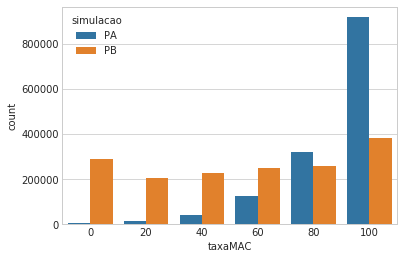

In [11]:
sns.countplot(x='taxaMAC',hue='simulacao', data=dfTaxaMAC)

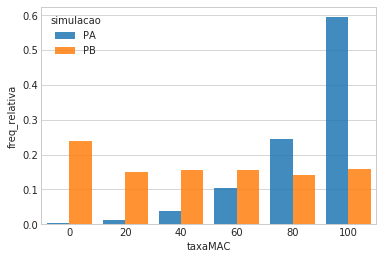

In [12]:
# DISTRIBUIÇÃO DA TAXA MAC PARA OS NÓS 1, 3 E 5
# DAS SIMULAÇÕES PA E PB

df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
df = df[df['node'] != 4]

dfPA = calcula_porcentagem_taxaMAC(df)
dfPA['simulacao'] = 'PA'
# fig = sns.barplot(x='taxaMAC',y='freq_relativa', data=df,saturation=1, color='#F2000D')

df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2 ]
df = df[df['node'] != 4]
dfPB = calcula_porcentagem_taxaMAC(df)
dfPB['simulacao'] = 'PB'

dfPorcentagem = dfPA.append(dfPB,ignore_index=True)


fig = sns.barplot(x='taxaMAC',y='freq_relativa', hue='simulacao',
                  data=dfPorcentagem,
                  saturation=1, alpha=0.85)

Text(0.5,1,'Distribuição da Taxa MAC')

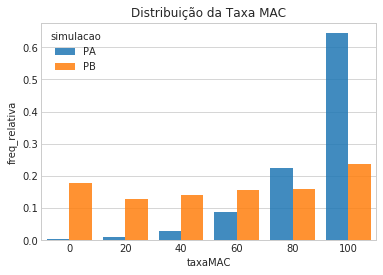

In [13]:
# DISTRIBUIÇÃO DA TAXA MAC PARA TODOS OS NÓS
# DAS SIMULAÇÕES PA E PB

df = dfTaxaMacPA
# df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
# df = df[df['node'] != 4]

dfPA = calcula_porcentagem_taxaMAC(df)
dfPA['simulacao'] = 'PA'
# fig = sns.barplot(x='taxaMAC',y='freq_relativa', data=df,saturation=1, color='#F2000D')

df = dfTaxaMacPB
# df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2 ]
# df = df[df['node'] != 4]
dfPB = calcula_porcentagem_taxaMAC(df)
dfPB['simulacao'] = 'PB'

dfPorcentagem = dfPA.append(dfPB,ignore_index=True)


fig = sns.barplot(x='taxaMAC',y='freq_relativa', hue='simulacao',
                  data=dfPorcentagem,
                  saturation=1, alpha=0.85)
fig.set_title('Distribuição da Taxa MAC')

Text(0.5,1,'Distribuição Taxa MAC - PA')

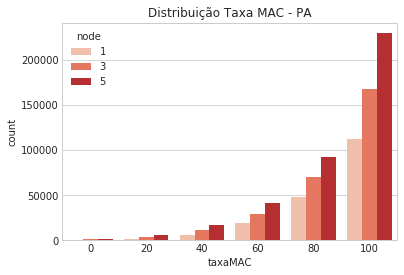

In [14]:
df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
df = df[df['node'] != 4]

fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=0.75, palette='Reds')
fig.set_title('Distribuição Taxa MAC - PA')

Text(0.5,1,'Distribuição Taxa MAC - PB')

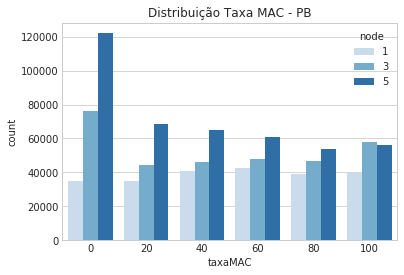

In [15]:
df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2]
df = df[df['node'] != 4]

fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=0.8, palette='Blues')
fig.set_title('Distribuição Taxa MAC - PB')

Text(0.5,1,'Distribuição Taxa MAC\nNós 1, 3 e 5')

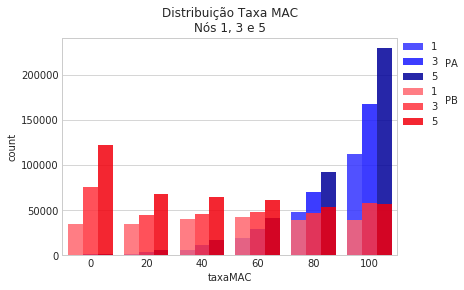

In [16]:
sns.set_style('whitegrid')
df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
df = df[df['node'] != 4]

cmPA = {
    1 : '#3333ff',
    3 : '#1a1aff',
    5 : '#000099'
}

fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=1, palette=cmPA, alpha=0.85)

df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2 ]
df = df[df['node'] != 4]

cmPB = {
    1 : '#ff666e',
    3 : '#ff333d',
    5 : '#F2000D'
}

fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=1, palette=cmPB, ax=fig, alpha=0.85)

#fig.legend()
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

plt.figtext(1.01,0.78,'PA')
plt.figtext(1.01,0.65,'PB')

fig.set_title('Distribuição Taxa MAC\nNós 1, 3 e 5')

In [17]:
# dfTaxaMacPA.groupby(by="taxaMAC",as_index=False).count()

## Distribuição Binomial

In [18]:
# Importando a Distribuição binomial da biblioteca scipy
from scipy.stats import binom

<Container object of 6 artists>

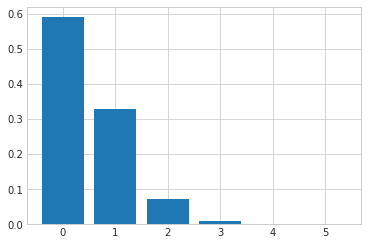

In [19]:
n, p = 5, 0.1
x = np.arange(0,n+1,1)
y = binom.pmf(x,n,p)
plt.bar(x,y)

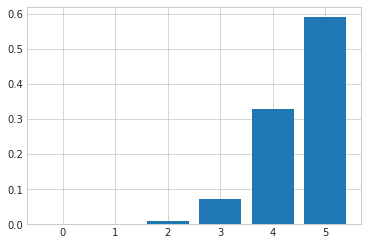

In [20]:
n, p = 5, 0.9
x = np.arange(0,n+1,1)
y = binom.pmf(x,n,p)
fig = plt.bar(x,y)

### Distribuição logarítimica Discreta

In [21]:
from scipy.stats import logser

<Container object of 5 artists>

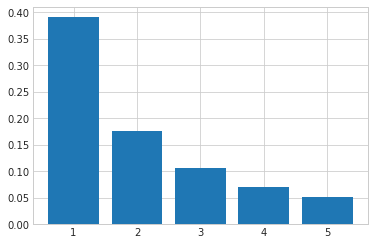

In [22]:
p = 0.9
x = np.arange(1,6,1)
rv = logser(p)
y = rv.pmf(x)
plt.bar(x,y)

<Container object of 5 artists>

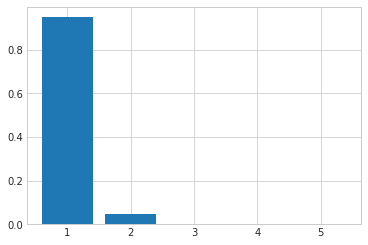

In [23]:
p = 0.1
x = np.arange(1,6,1)
rv = logser(p)
y = rv.pmf(x)
plt.bar(x,y)

### Zipf Distribuição

<Container object of 5 artists>

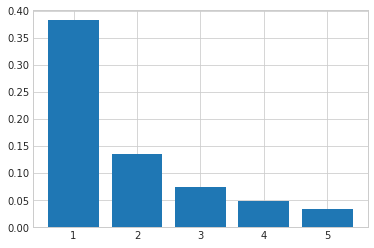

In [27]:
from scipy.stats import zipf
a = 1.5
rv = zipf(a)
x = np.arange(1,6,1)
y = rv.pmf(x)
plt.bar(x,y)